# Prepare

I will prepare my data for exploreation in this notebook.

**Imports**

In [1]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# internal imports
import sys
sys.path.append("/Users/migashane/CodeUp/Data_Science/telco_churn_classification_project/util_")
import acquire_

**Get data**

The data here is comming from `acquire_.py` file in my `util_` folder. I see have thhe query here if closure is neede on exact data retrieved.

In [2]:
# get my data
telco, query = acquire_.get_telco_data()

telco.head() # transpose my data to get a better look

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## Remove redundant columns

In [3]:
# run a cross tabulation on internet type and internet type id...
# to see if I don't have duplicated imformation
pd.crosstab(telco.internet_service_type, telco.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2421,0,0
Fiber optic,0,3096,0
None,0,0,1526


In [4]:
# run an other cross tabulation on contract_type and contract_type_id...
# to see if I don't have duplicated imformation
pd.crosstab(telco.contract_type_id, telco.contract_type)

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [5]:
# run an other cross tabulation on payment_type and payment_type_id...
# to see if I don't have duplicated imformation
pd.crosstab(telco.payment_type, telco.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [6]:
# lis of columns to remove
drop_cols = ["internet_service_type_id", 
             "contract_type_id",
            "payment_type_id"]

# remove the columns
print("Original dataframe size:", telco.shape)
telco = telco.drop(columns=drop_cols)
print("New dataframe size:", telco.shape)

Original dataframe size: (7043, 24)
New dataframe size: (7043, 21)


**Removed columns:**

- `custromer_id` doesn't look important in predicting churn, so I will remove it from my dataframe

- `internet_service_type_id` and `internet_service_type` are relaying the same information, so I will remove internet_service_type_id beause it is valuable for me to know the name of the type of internet.

- `contract_type` and `contract_type_id` are also relaying the same information, so I will remove contract_type_id because it is important that I know the name of the contract.

- `payment_type` and `payment_type_id` are also relaying the same information, so I will remove payment_type_id because it is important that I know the name of the type of payment.

# Check columns datatypes

look at what is contained in the columns and find incorect datatypes.

**Object columns**

In [7]:
# retrieve object data type columns
telco.select_dtypes("object").head(3)

,customer_id,gender,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,No,No,Yes,Yes,No,No,No,No,No,Yes,No,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,No,No,Yes,No,No,No,Yes,No,No,No,Yes,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [8]:
# loock at the unique values stored in the total charges column
telco.total_charges.value_counts(dropna=False)

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [9]:
# get the mean of all the rows of total charges that are actual numbers
mean_of_digits_in_total_charges = telco[telco.total_charges.str.isdigit()].total_charges.astype("float").mean()


# replace all the empty (" ") cells with the mean of the digit rows of total_charges
# then convert the column into a float data type column
telco["total_charges"] = telco["total_charges"].str.replace(" ", str(mean_of_digits_in_total_charges)).astype("float")

# check if the column was coverted succesfult by retrieving object data type columns again
telco.select_dtypes("object").head(3)

,customer_id,gender,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,No,No,Yes,Yes,No,No,No,No,No,Yes,No,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,No,No,Yes,No,No,No,Yes,No,No,No,Yes,Yes,Month-to-month,Fiber optic,Electronic check


**Numericcolumns**

In [10]:
telco.select_dtypes("number").head(3)

,senior_citizen,tenure,monthly_charges,total_charges
0,0,9,65.6,593.30
1,0,9,59.9,542.40
2,0,4,73.9,280.85


**Check data types:**

- total_charges` column is a string buy that is not the correect data type, so I will covert it into float.

    - This column contains 11 rows filled by empty spaces (" ") into them, so I will replace them with `mean` of the the column.
   

## Visualize values counts

Here simply want to visualize my features and understand them better.

**Numeric columns**

SENIOR_CITIZEN
0    5901
1    1142
Name: senior_citizen, dtype: int64
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64


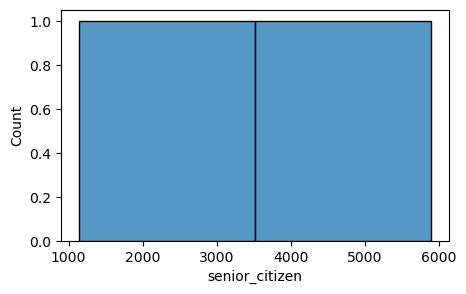

TENURE
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: tenure, Length: 73, dtype: float64


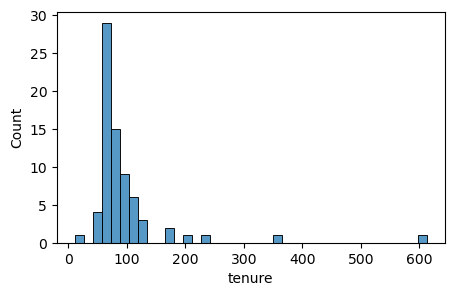

MONTHLY_CHARGES
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_charges, Length: 1585, dtype: int64
20.05     0.008661
19.85     0.006389
19.95     0.006247
19.90     0.006247
20.00     0.006105
            ...   
116.55    0.000142
106.85    0.000142
68.55     0.000142
108.80    0.000142
67.85     0.000142
Name: monthly_charges, Length: 1585, dtype: float64


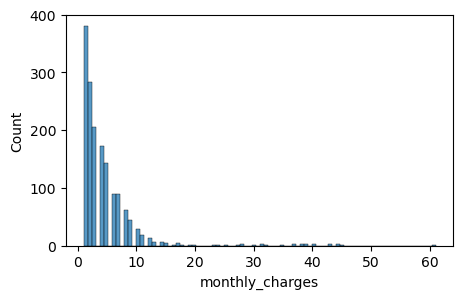

TOTAL_CHARGES
2323.941358    11
20.200000      11
19.750000       9
19.900000       8
20.050000       8
               ..
2387.750000     1
6302.800000     1
2058.500000     1
829.550000      1
3707.600000     1
Name: total_charges, Length: 6531, dtype: int64
2323.941358    0.001562
20.200000      0.001562
19.750000      0.001278
19.900000      0.001136
20.050000      0.001136
                 ...   
2387.750000    0.000142
6302.800000    0.000142
2058.500000    0.000142
829.550000     0.000142
3707.600000    0.000142
Name: total_charges, Length: 6531, dtype: float64


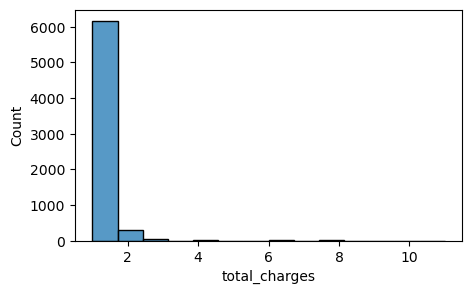

In [11]:
# get all numeric column names
numeric_cols = telco.select_dtypes("number").columns

# create numeric columns value counts visuals
for col in numeric_cols:
    
    # print value counts an normalized value counts
    print(col.upper())
    print(telco[col].value_counts(dropna=False))
    print(telco[col].value_counts(dropna=False, normalize=True))
    
    # show visuals of the value counts
    plt.figure(figsize=(5,3))
    sns.histplot(telco[col].value_counts(dropna=False))
    plt.show()
    


**What I see on numeric columns:**

- `senior_citizen` contains 2 binary numbers and value 0 contains 84% all all the data. This means that only 16% are sinior sitizens.
- `tenure` is a continious variable and it is the number of month a customer has been witht the telco's services.
- `monthly_charges`: is continious variable and it is the amount each customer is being charged every month.
- `total_charges` is a continious variable and it is the sum of all the payments completed by the customer.

**Object columns**

CUSTOMER_ID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
0002-ORFBO    0.000142
6616-AALSR    0.000142
6625-UTXEW    0.000142
6625-IUTTT    0.000142
6625-FLENO    0.000142
                ...   
3352-RICWQ    0.000142
3352-ALMCK    0.000142
3351-NQLDI    0.000142
3351-NGXYI    0.000142
9995-HOTOH    0.000142
Name: customer_id, Length: 7043, dtype: float64


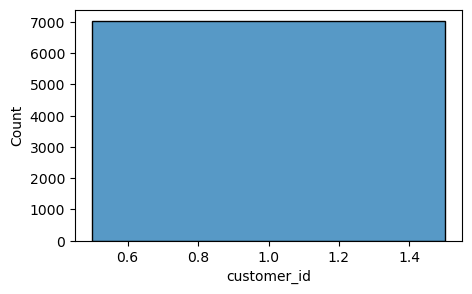

GENDER
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64


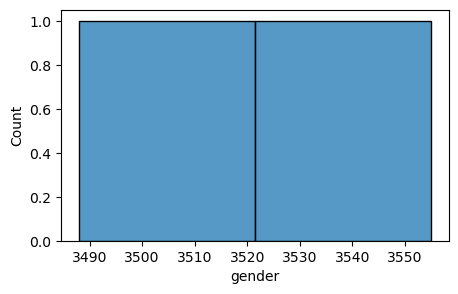

PARTNER
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64


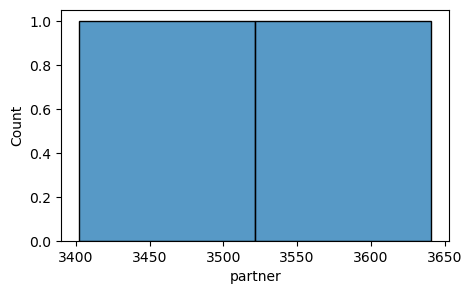

DEPENDENTS
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64


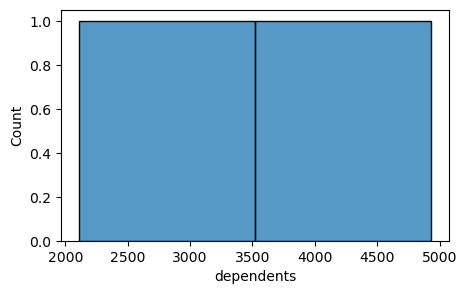

PHONE_SERVICE
Yes    6361
No      682
Name: phone_service, dtype: int64
Yes    0.903166
No     0.096834
Name: phone_service, dtype: float64


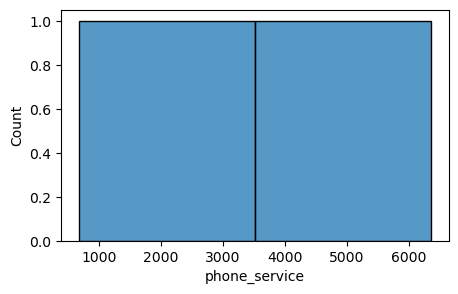

MULTIPLE_LINES
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64


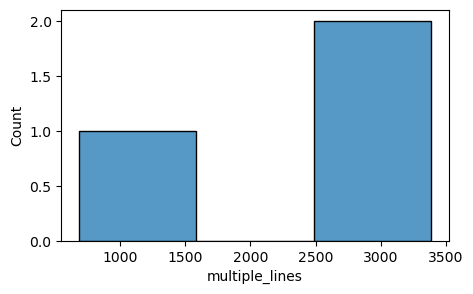

ONLINE_SECURITY
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: online_security, dtype: float64


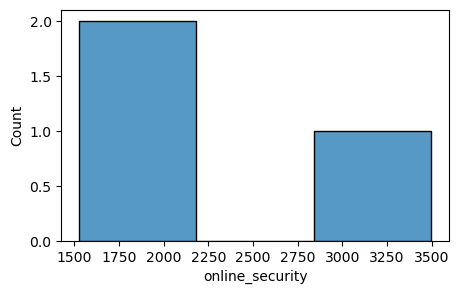

ONLINE_BACKUP
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: online_backup, dtype: float64


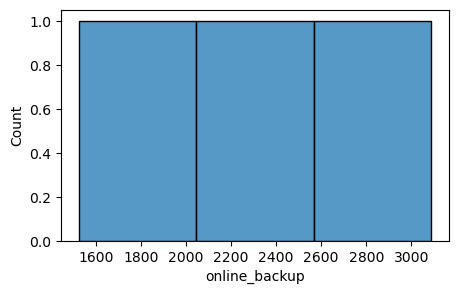

DEVICE_PROTECTION
No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: device_protection, dtype: float64


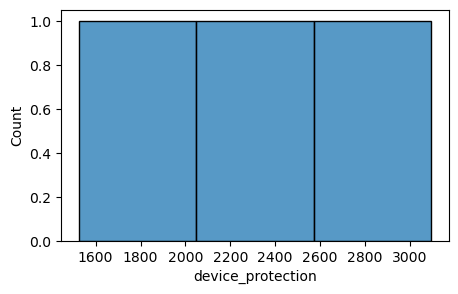

TECH_SUPPORT
No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: tech_support, dtype: float64


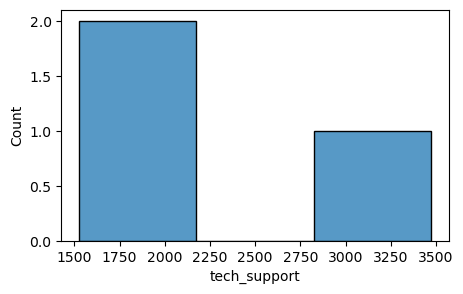

STREAMING_TV
No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: streaming_tv, dtype: float64


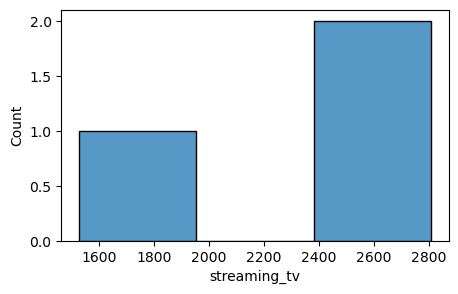

STREAMING_MOVIES
No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: streaming_movies, dtype: float64


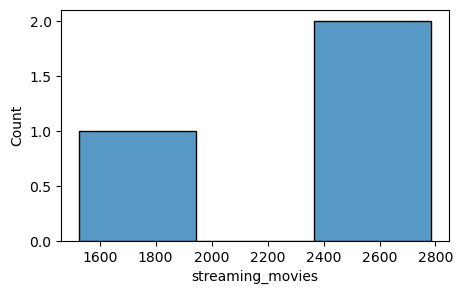

PAPERLESS_BILLING
Yes    4171
No     2872
Name: paperless_billing, dtype: int64
Yes    0.592219
No     0.407781
Name: paperless_billing, dtype: float64


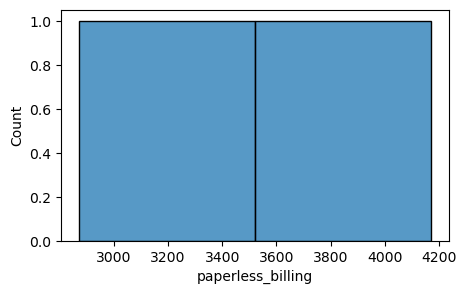

CHURN
No     5174
Yes    1869
Name: churn, dtype: int64
No     0.73463
Yes    0.26537
Name: churn, dtype: float64


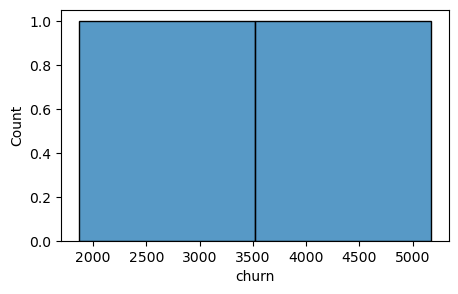

CONTRACT_TYPE
Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: contract_type, dtype: float64


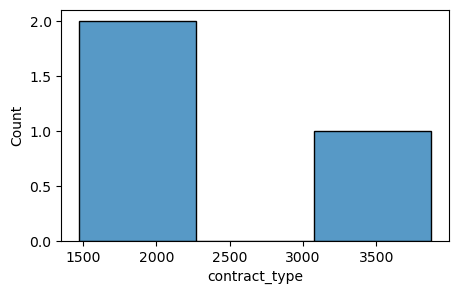

INTERNET_SERVICE_TYPE
Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64
Fiber optic    0.439585
DSL            0.343746
None           0.216669
Name: internet_service_type, dtype: float64


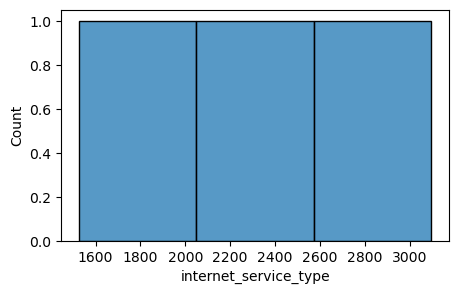

PAYMENT_TYPE
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: payment_type, dtype: float64


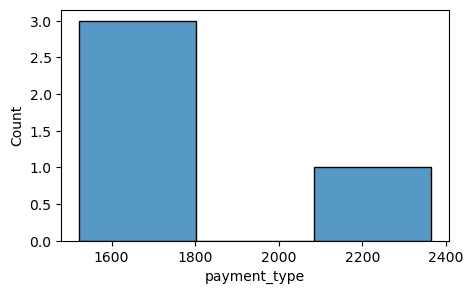

In [12]:
# get all object column names
object_cols = telco.select_dtypes("object").columns

# create object columns value counts visuals
for col in object_cols:
    
    # print value counts an normalized value counts
    print(col.upper())
    print(telco[col].value_counts(dropna=False))
    print(telco[col].value_counts(dropna=False, normalize=True))
    
    # show visuals of the value counts
    plt.figure(figsize=(5,3))
    sns.histplot(telco[col].value_counts(dropna=False))
    plt.show()
    


**What I see on object columns:**

- `gender` is a two choice categorical variable and the counts are split about equaly on both directions.
- `partner` is a two choice categorical variable and the counts are split about equaly on both directions. It identifies the customers who have have a spouse on the line.
- `dependents` is a two choice categorical variable and about 70% of them don't have dependents.
- `multiple_lines` is a two choice categorical variable and only a small count (about 6% more) of customers more have don't have multiple lines.
- `online_security` is a three choice categorical variable and about 50% of them don't have online security while they have internet service.
- `online_backup` is a three choice categorical variable and about 43% of them don't have online backup while they haveinternet service.
- `device_protection` is a three choice categorical variable and about 43% of them don't have device protection while they have internet service.
- `tech_support` is a three choice categorical variable and about 50% of them don't receive technical support while they have internet service.
- `stream_tv` is a three choice categorical variable and about 40% of them don't rdon't stream tv while they have internet service.
- `stream_movies` is a three choice categorical variable and about 40% of them don't rdon't stream movies while they have internet service.
- `paperless_billing` is a two choice categorical variable and about 60% of them have paperless billing
- `churn` is a two choice categorical variable and about 20% of the customers are churn.
- `contract_type` is a three choice categorical variable and about 55% of the customers are month to month.
- `internet_service_type` is a three choice categorical variable and about 44% of the customers have fiber optic.
- `payment_type` is a three choice categorical variable and about 33% of the customers use electronice check.


## Encode categorical variable

Here I will use pandas to generate dummie variables for all the categorical columns in my data.

**Separate categorical vaiables from continious variables**

In [13]:
# get all columns from dataframe
all_columns = telco.columns

# containers of different variable types
categorical = []

# separate variables
for col in all_columns:
    # count number of unique valus in the column
    len_of_uniq = len(telco[col].unique())
    
    # also checking for only object data types
    if (col != "churn") and (len_of_uniq <= 5) and (telco[col].dtype == "O"):
        categorical.append(col)
    else: pass
        
categorical

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'contract_type',
 'internet_service_type',
 'payment_type']

**Make the dummies based on categorical variables**

In [14]:
# generate dummy variables for each categorical column
telco_dummies = pd.get_dummies(telco[categorical])
telco_dummies.head(3)

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,0,0,1,0,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
1,0,1,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0


**Encode target colum (church)**

I am encoding churn separate from all the other columns because I only want it as one dummy column not two.

In [15]:
# generate dummy variable for the target column
target_dummy = pd.get_dummies(telco["churn"], drop_first=True)
target_dummy.head(3)

,Yes
0,0
1,0
2,1


In [16]:
# get column name of all the dummies
dummy_cols = telco_dummies.columns

# clean the dummy columns by replacing "-" with "_" and make the name lower case
dummy_cols = dummy_cols.str.replace("-", "_").str.lower()

# concatinate the dummies to the telco data frame
telco["churn"] = target_dummy
telco[dummy_cols] = telco_dummies

telco.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_month_to_month,contract_type_one year,contract_type_two year,internet_service_type_dsl,internet_service_type_fiber optic,internet_service_type_none,payment_type_bank transfer (automatic),payment_type_credit card (automatic),payment_type_electronic check,payment_type_mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0


In [17]:
# clean empty spaces in column names
    all_columns_and_dummies = telco.columns
    new_cols = []
    for i in all_columns_and_dummies:
        new_cols.append(i.replace(" ", "_"))
    telco[new_cols] = telco

IndentationError: unexpected indent (3279732481.py, line 2)

**Add a baseline column**

Here I am adding the base line based on mode of my target column (churn) for later use in the modeing process

In [ ]:
# add a base line column for modeling
telco["baseline"] = int(telco.churn.mode())
telco.head(3)

**Remove original categorical columns**

Here I am removing all the original categorical columns from the dataset because I have created dummies for them.

In [ ]:
# # remove all original cate gorical columns and re-assign telco
# telco = telco.drop(columns=categorical)
# telco.head(3)

## Split data

Here I use sklean to split my data into train, validate, and test. 

**Note: Must do this step**

In [ ]:
# standard split 20/20/60 with random state
test_size = 0.2
validate_size = 0.2
random_state = 95
stratify_col = "churn"

# split into training and test sets
train_validate, test = train_test_split(telco,
                                        test_size=test_size,
                                        random_state=random_state, 
                                        stratify=telco[stratify_col]) # target column
# split into training and validate sets
train, validate = train_test_split(train_validate, 
                                   test_size=validate_size/(1-test_size), # 20% of train_and_test
                                   random_state=random_state, 
                                   stratify=train_validate[stratify_col])

train.shape, validate.shape, test.shape